In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

csv_df = pd.read_csv("DataEngineer.csv")

csv_df.head(3)



,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


<AxesSubplot:xlabel='Company Name'>

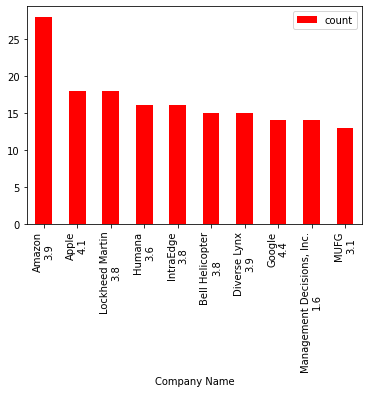

In [18]:


temp_df = csv_df.groupby("Company Name").agg({"Company Name": "count"}).rename(columns={"Company Name":"count"}).sort_values("count", ascending=False)
# группируем по названии конпаний, высчитываем количество уникальных в этом же столбце, переименуем столбец в количество (не деат сортировать изза того что колонки и строки имеют одно название), сортируем от большего к меньшему
# print(list(temp_df))
# print(temp_df)
temp_df.head(10).plot.bar(color="Red")
# выводим верхние 10 компаний в столбчатую диаграмму



<AxesSubplot:xlabel='Job Title'>

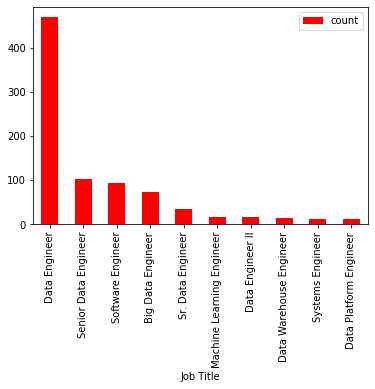

In [19]:


temp_df = csv_df.groupby("Job Title").agg({"Job Title": "count"}).rename(columns={"Job Title":"count"}).sort_values("count", ascending=False)
# группируем по названии конпаний, высчитываем количество уникальных в этом же столбце, переименуем столбец в количество (не деат сортировать изза того что колонки и строки имеют одно название), сортируем от большего к меньшему
# print(list(temp_df))
# print(temp_df)
temp_df.head(10).plot.bar(color="Red")
# выводим верхние 10 компаний в столбчатую диаграмму



array([<AxesSubplot:ylabel='count'>], dtype=object)

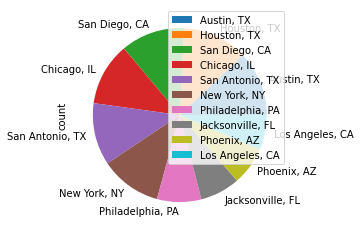

In [20]:


temp_df = csv_df.groupby("Location").agg({"Location": "count"}).rename(columns={"Location":"count"}).sort_values("count", ascending=False)
# группируем по названии конпаний, высчитываем количество уникальных в этом же столбце, переименуем столбец в количество (не деат сортировать изза того что колонки и строки имеют одно название), сортируем от большего к меньшему
# print(list(temp_df))
# print(temp_df)
temp_df.head(10).plot(subplots=True, kind="pie")
# не красится
# выводим верхние 10 компаний в столбчатую диаграмму



<AxesSubplot:xlabel='Sector'>

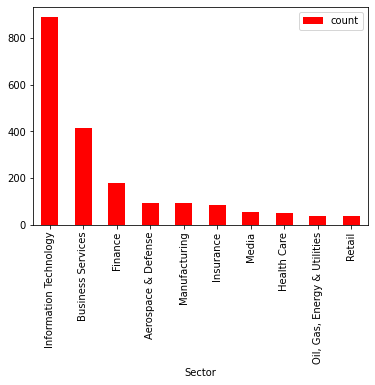

In [23]:


temp_df = csv_df.groupby("Sector").agg({"Sector": "count"}).rename(columns={"Sector":"count"}).sort_values("count", ascending=False)
# группируем по названии конпаний, высчитываем количество уникальных в этом же столбце, переименуем столбец в количество (не деат сортировать изза того что колонки и строки имеют одно название), сортируем от большего к меньшему
# print(list(temp_df))
# print(temp_df)
temp_df[temp_df.index.values != "-1"].head(10).plot.bar(color="Red")
# выводим верхние 10 компаний в столбчатую диаграмму



[<AxesSubplot:ylabel='Type of ownership'>]


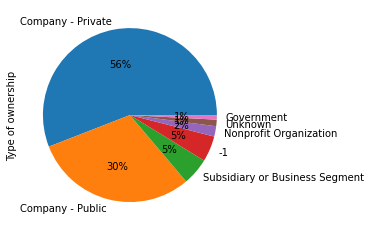

In [24]:


print(csv_df["Type of ownership"].value_counts().head(7).plot(subplots=True, kind="pie", autopct='%1.0f%%'))



In [25]:


csv_df['Sector'].value_counts().index



Index(['Information Technology', 'Business Services', '-1', 'Finance',
       'Aerospace & Defense', 'Manufacturing', 'Insurance', 'Media',
       'Health Care', 'Oil, Gas, Energy & Utilities', 'Retail',
       'Biotech & Pharmaceuticals', 'Telecommunications', 'Education',
       'Accounting & Legal', 'Government', 'Transportation & Logistics',
       'Real Estate', 'Consumer Services', 'Restaurants, Bars & Food Services',
       'Construction, Repair & Maintenance',
       'Arts, Entertainment & Recreation', 'Travel & Tourism', 'Non-Profit',
       'Agriculture & Forestry'],
      dtype='object')

In [26]:


csv_df.shape[0]



2528

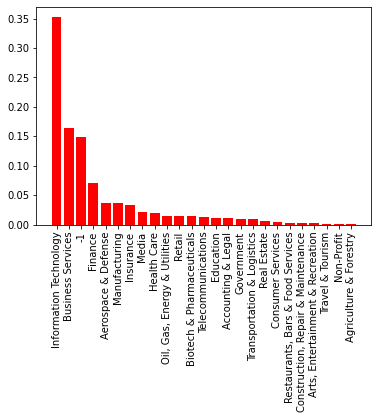

In [28]:


plt.bar(csv_df['Sector'].value_counts().index, csv_df['Sector'].value_counts().values/csv_df.shape[0], color="Red")
plt.xticks(rotation=90)
plt.show()



<AxesSubplot:xlabel='Sector'>

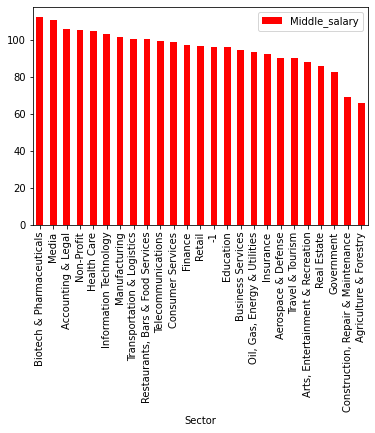

In [29]:
csv_df["Salary Estimate"]
csv_df["tmp"] = csv_df["Salary Estimate"].apply(lambda x: x.split(" ")[0])
csv_df["tmp"] = csv_df["Salary Estimate"].apply(lambda x: x.split("(")[0])
csv_df["Bottom_salary"] = csv_df["tmp"].apply(lambda x: int(x.split("-")[0][1:-1]))
csv_df["Top_slary"] = csv_df["tmp"].apply(lambda x: int(x.split("-")[1][1:-2]))

csv_df["Middle_salary"] = (csv_df["Bottom_salary"] + csv_df["Top_slary"])/2

csv_df.groupby("Sector").agg({"Middle_salary":"mean"}).sort_values("Middle_salary", ascending=False).plot.bar(color="Red")

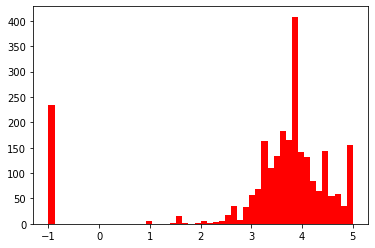

In [31]:


plt.hist(csv_df['Rating'], bins=50, color="Red")
plt.show()



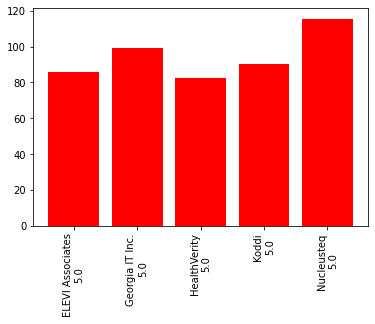

In [33]:


popular_company = csv_df[csv_df['Rating']==5]['Company Name'].value_counts().head(5).index

plt.bar(csv_df[csv_df['Company Name'].isin(popular_company)].groupby('Company Name')['Middle_salary'].mean().index,
csv_df[csv_df['Company Name'].isin(popular_company)].groupby('Company Name')['Middle_salary'].mean().values, color="Red")
plt.xticks(rotation=90)
plt.show()



In [ ]:
wordcloud2 = WordCloud().generate(' '.join(csv_df['Job Description']))
array = wordcloud2.to_array()
print(array)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()